In [24]:
import cv2
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import neural_network
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 

In [25]:
from PIL import Image

def process_image(path):
    img = Image.open(path)
    new_size = (32, 32)
    img = img.resize(new_size)
    # img = np.asarray(img) / 255.0  # Convert to array and normalize
    return img

In [26]:
inputs = []
outputs = []

for filename in os.listdir("./data/normal"):
    file_path = os.path.join("./data/normal", filename)
    inputs.append(file_path)
    outputs.append(0)

for filename in os.listdir("./data/sepia"):
    file_path = os.path.join("./data/sepia", filename)
    inputs.append(file_path)
    outputs.append(1)

noData = len(inputs)

inputs = np.array(inputs)
outputs = np.array(outputs)

permutation = np.random.permutation(noData)

inputs = inputs[permutation]
outputs = outputs[permutation]

print(inputs[:10])
print(outputs[:10])

['./data/sepia\\20200717_193344.jpg' './data/normal\\20200907_194201.jpg'
 './data/normal\\b090deacc7ca3312fcfbeffb06e6ac3c.jpg'
 './data/sepia\\c26829ee2942891d124e0caa0e6c089a.jpg'
 './data/sepia\\20211125_234957.jpg' './data/normal\\MIH_0168.jpg'
 './data/normal\\FB_IMG_1629367672021.jpg'
 './data/normal\\20210601_185430.jpg' './data/sepia\\MIH_0930_sepia.jpg'
 './data/normal\\received_117763209573477.jpeg']
[1 0 0 1 1 0 0 0 1 0]


In [27]:
import random

def split_data(inputs, outputs):
    indexes = [i for i in range(len(inputs))]

    train_samples = np.random.choice(indexes, int(0.8 * len(inputs)))
    test_samples = [i for i in indexes if not i in train_samples]
    
    random.shuffle(test_samples)

    train_inputs = [inputs[i] for i in train_samples]
    train_outputs = [outputs[i] for i in train_samples]

    test_inputs = [inputs[i] for i in test_samples]
    test_outputs = [outputs[i] for i in test_samples]

    return train_inputs, train_outputs, test_inputs, test_outputs

In [28]:
train_inputs, train_outputs, test_inputs, test_outputs = split_data(inputs, outputs)

In [29]:
def get_parameters(images):
    parameters = []
    for image in images:
        image = process_image(image)

        image_parameters = []
        for pixel in list(image.getdata()):
            r, g, b = pixel[:3]  # Extract RGB values
            image_parameters.extend([r, g, b])
        parameters.append(image_parameters)

    return parameters

In [30]:
train_inputs = get_parameters(train_inputs)

train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)

test_inputs = get_parameters(test_inputs)

test_inputs = np.array(test_inputs)
test_outputs = np.array(test_outputs)

train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

In [31]:
X_train = [np.reshape(train_inputs[i],(32,32,3)) for i in range(len(train_inputs))]
X_train = np.array(X_train)
Y_train = to_categorical(train_outputs, num_classes=2)

X_test = [np.reshape(test_inputs[i],(32,32,3)) for i in range(len(test_inputs))]
X_test = np.array(X_test)
Y_test = to_categorical(test_outputs, num_classes=2)

In [32]:
model = Sequential()#add model layers

# Define the input layer
model.add(layers.Input(shape=(32, 32, 3)))
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             202 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721,198 (2.75 MB)

 Trainable params: 721,198 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
cnn = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4982 - loss: 0.7274 - val_accuracy: 0.5178 - val_loss: 0.6895
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5424 - loss: 0.6994 - val_accuracy: 0.5178 - val_loss: 0.6887
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5520 - loss: 0.6950 - val_accuracy: 0.5178 - val_loss: 0.6877
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4488 - loss: 0.7299 - val_accuracy: 0.5217 - val_loss: 0.6871
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5457 - loss: 0.7012 - val_accuracy: 0.5455 - val_loss: 0.6867
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5231 - loss: 0.7153 - val_accuracy: 0.5415 - val_loss: 0.6862
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5319 - loss: 0.6908 - val_accuracy: 0.5415 - val_loss: 0.6853
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5584 - loss: 0.6770 - val_accuracy: 0.

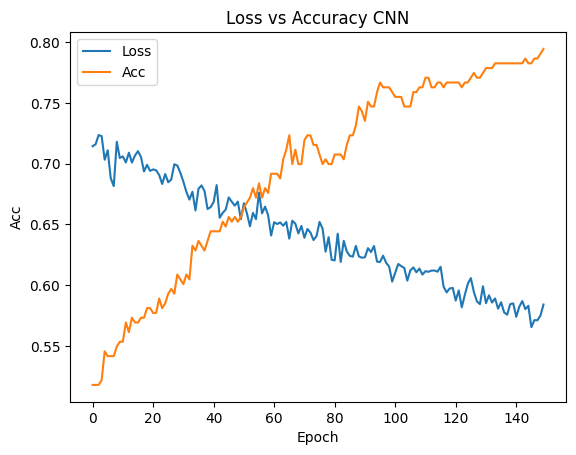

In [34]:
plt.plot(cnn.history['loss'], label='Loss')
plt.plot(cnn.history['val_accuracy'], label='Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Loss vs Accuracy CNN')
plt.legend()
plt.show()

In [35]:
model = Sequential()#add model layers

# Define the input layer
model.add(layers.Input(shape=(32, 32, 3)))

# Convolutional Layer 1
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 2
model.add(Convolution2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D((2, 2)))

# # Convolutional Layer 3
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((1, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             202 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,094 (976.93 KB)

 Trainable params: 250,094 (976.93 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cnn = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4666 - loss: 0.7497 - val_accuracy: 0.4625 - val_loss: 0.7087
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4567 - loss: 0.7492 - val_accuracy: 0.4545 - val_loss: 0.7075
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5319 - loss: 0.7134 - val_accuracy: 0.4585 - val_loss: 0.7068
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4547 - loss: 0.7439 - val_accuracy: 0.4506 - val_loss: 0.7062
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4923 - loss: 0.7305 - val_accuracy: 0.4387 - val_loss: 0.7057
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5127 - loss: 0.7109 - val_accuracy: 0.4545 - val_loss: 0.7054
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4988 - loss: 0.7185 - val_accuracy: 0.4625 - val_loss: 0.7051
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4483 - loss: 0.7402 - val_accuracy: 0.

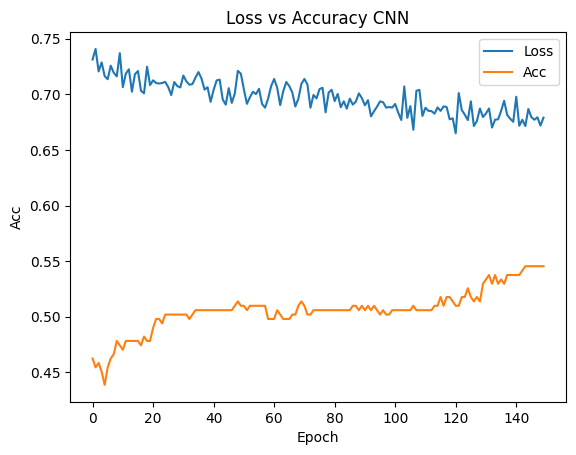

In [37]:
plt.plot(cnn.history['loss'], label='Loss')
plt.plot(cnn.history['val_accuracy'], label='Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Loss vs Accuracy CNN')
plt.legend()
plt.show()